### Evaluating models on the basis of metrics
- Using LinearRegression (from sklearn.linear_model package) as Base model.
- Other used models as Ridge Regression (L2 regularization), Decision Tree, Random Forest, and XGBoost
- Fitting train data and checking for performance metrices on train and test data

## Table of Contents
- [Loading dataset](#Step-1:-Loading-Dataset-and-Checking-details) <br>
- [Splitting data](#Splitting-data)
- [Models Evaluation with original data and default parameters](#Models-evaluation-with-original-data-and-default-parameters)
- [1. LinearRegression (Baseline mode)](#1.-LinearRegression-(Baseline-mode))


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model  import LinearRegression

### Loading Dataset
- Load data from train and test files, which is saved after performing EDA

In [7]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [8]:
df_sample = pd.read_csv('/content/driver/MyDrive/Capstone_Code_DB_GoogleCoLab/DataSets/sample_after_eda_2.csv', index_col='Row_ID', low_memory=False)
df_sample.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVVar1,NVVar2,...,NVCat_F,NVCat_G,NVCat_H,NVCat_I,NVCat_J,NVCat_K,NVCat_L,NVCat_M,NVCat_N,NVCat_O
Row_ID,,,,,,,,,,,,,,,,,,,,,
48,-0.392708,0.394228,0.426171,0.316372,-0.210252,-0.275857,-1.021362,-0.208853,-0.263354,1.330680,...,0,0,0,0,0,0,0,0,1,0
102,-0.665897,-0.816152,-0.823407,-0.749192,-0.198358,-0.650165,-0.861623,-0.750637,-0.263354,1.330680,...,0,0,0,0,0,0,0,0,0,0
155,2.130275,0.826507,1.629469,1.162057,2.067504,1.162886,1.374723,0.373329,-0.263354,0.941460,...,0,0,1,0,0,0,0,0,0,0
212,-0.754282,-1.680709,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-0.265708,-0.263354,-0.309405,...,0,0,1,0,0,0,0,0,0,0
352,3.456046,0.307772,1.606328,0.400940,2.626535,1.360567,1.423873,-0.652283,-0.263354,-0.309405,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df_sample.shape

(95605, 158)

#### Removing outliers from data and then performing modeling

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR

### Removing outliers from output valiables, which are 4% of the whole dataset.

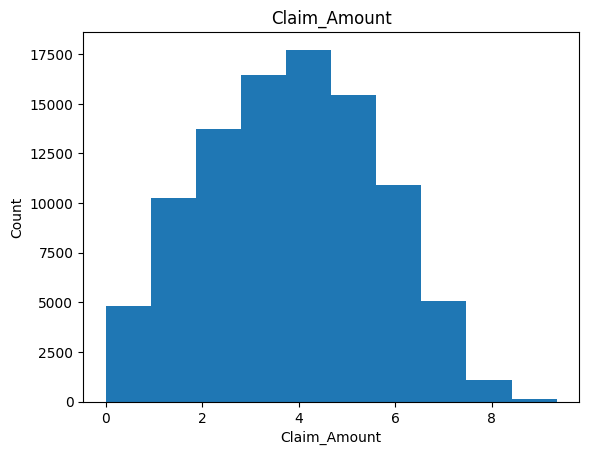

In [ ]:
plt.figure()
plt.hist(df_sample['Claim_Amount'])
#sns.ecdfplot(np.log(df_claimpred[c]+1))
plt.title('Claim_Amount')
plt.xlabel('Claim_Amount')
plt.ylabel('Count')
plt.show()

In [ ]:
### Handle outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05)
df_sample['outlier'] = outlier_detector.fit_predict(df_sample[['Claim_Amount']])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# Remove outliers
df_sample = df_sample[df_sample['outlier'] != -1]

In [64]:
df_sample.shape
#95605 -90829
4776/95605

0.0499555462580409

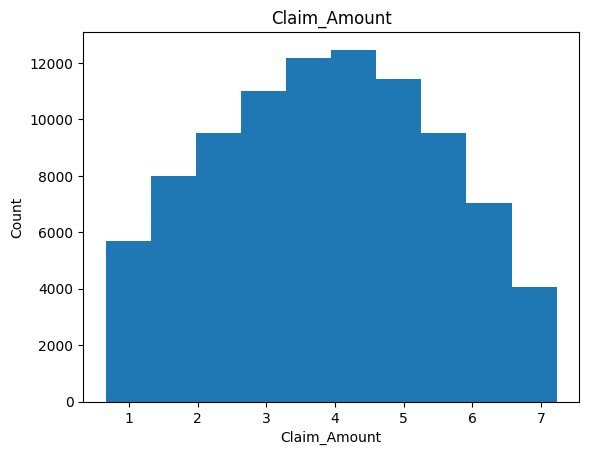

In [ ]:
plt.figure()
plt.hist(df_sample['Claim_Amount'])
#sns.ecdfplot(np.log(df_claimpred[c]+1))
plt.title('Claim_Amount')
plt.xlabel('Claim_Amount')
plt.ylabel('Count')
plt.show()

### Splitting data
- Spliting data into Train and Test datasets using 80 - 20 ratio

In [11]:
X = df_sample.drop(columns=['Claim_Amount'])
y = df_sample['Claim_Amount']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
print(f"Shape of Train data: {X_train.shape}, Shape of Test data: {X_test.shape}")

Shape of Train data: (76484, 157), Shape of Test data: (19121, 157)


In [16]:
# Dictionary to store regression metrics
metrics = {
    'Model_Name': [],
    'MSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train_Score' : [],
    'Time_Taken':[],
    'best_params':[]
}


{'Model_Name': [],
 'MSE': [],
 'MAE': [],
 'R2 Score': [],
 'Train_Score': [],
 'Time_Taken': [],
 'best_params': []}

In [18]:
metrics

{'Model_Name': ['SVR_PCA'],
 'MSE': [3.328696258584926],
 'MAE': [1.5050744095682247],
 'R2 Score': [-0.05453757464854547],
 'Train_Score': [],
 'Time_Taken': [],
 'best_params': []}

#### Models Evaluation with original data and default parameters

### 1. LinearRegression (Baseline mode)

#### Creating Pipeline for applying scaling on data using StandartScalar and then creating LinearRegression model

In [ ]:

# store starting time
begin = time.time()
estimator = [
    ('scaler',StandardScaler()),
    ('PCA', PCA()),
    ('linearReg',LinearRegression())
]

pipe_LR = Pipeline(estimator)

pipe_LR.fit(X_train, y_train)

train_score = pipe_LR.score(X_train, y_train)
test_score = pipe_LR.score(X_test, y_test)

y_pred = pipe_LR.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics['Model_Name'].append('LinearRegression')
metrics['MSE'].append(mse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train_Score'].append(train_score)

# program body ends
time.sleep(1)
# store end time
end = time.time()
# total time taken
timetaken = end -begin
metrics['Time_Taken'].append(timetaken)

metrics

{'Model_Name': ['LinearRegression'],
 'MSE': [3.106749748718474],
 'MAE': [1.4624112496759387],
 'R2 Score': [0.015775519738677413],
 'Train_Score': [0.018048953689320912],
 'Time_Taken': [7.129780292510986],
 'best_params': []}

#### As per the metrics for LinearRegression Model
1. MSE is high compaired to MAE, as data has outliers
2. R2 score is not good

### ************************************ Ridge Regression (L2 regularization) ************************************

### 2. Ridge Regression (L2 regularization)

In [ ]:
from sklearn.linear_model import Ridge

# store starting time
begin = time.time()
estimator_red = [
    ('scaler',StandardScaler()),
     ('PCA', PCA()), # 80,75,All
    ('Redge',Ridge(1.0 ))
]

pipe_Red = Pipeline(estimator_red)
#pipe_Red.fit(X_train, y_train)

params_Red = {
         #'Redge__n_estimators':[10,14,],
         #'Redge__max_depth': [14,28],
         #'Redge__min_samples_split': [5,10],
         #'Redge__random_state': [42,50],
         #'Redge__max_features': ['sqrt','log2'],
         #'scaler': [StandardScaler(), MinMaxScaler()]
         #'PCA__n_components':[70,75,80,85,90,95,100]
         }

grids_Rd = GridSearchCV(pipe_Red, param_grid=params_Red, cv=5)

grid_fit_Rd = grids_Rd.fit(X_train, y_train)

#y_pred = grid_fit_Rd.predict(X_test)

best_param = grids_Rd.best_params_
best_model = grid_fit_Rd.best_estimator_


train_score = grid_fit_Rd.score(X_train, y_train)
test_score = grid_fit_Rd.score(X_test, y_test)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics['Model_Name'].append('Ridge_PCA')
metrics['MSE'].append(mse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train_Score'].append(train_score)
metrics['Time_Taken'].append(time.time() - begin)
metrics['best_params'].append(best_param)

metrics

{'Model_Name': ['LinearRegression', 'Ridge_PCA'],
 'MSE': [3.106749748718474, 3.1061649665558715],
 'MAE': [1.4624112496759387, 1.4623847196054327],
 'R2 Score': [0.015775519738677413, 0.01596077988725919],
 'Train_Score': [0.018048953689320912, 0.0180957257153338],
 'Time_Taken': [7.129780292510986, 15.544281005859375],
 'best_params': [{}]}

#### As per the metrics for Ridge Model
1. If compaired MSE and MAE with baseline model, there is a slight decrease.
2. In case of R2, train and test scores there is a slight increase is visible.

### ************************************ DecisionTreeRegressor ************************************

### 3. DecisionTreeRegressor

In [ ]:

# store starting time
begin = time.time()
estimator_dt = [
    ('scaler',RobustScaler()),
     ('PCA', PCA()),
    ('DT',DecisionTreeRegressor(random_state=42))
]

pipe_DT = Pipeline(estimator_dt)

pipe_DT.fit(X_train, y_train)

train_score = pipe_DT.score(X_train, y_train)
test_score = pipe_DT.score(X_test, y_test)
y_pred = pipe_DT.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


metrics['Model_Name'].append('DecisionTreeRegressor_MinMaxScaler')
metrics['MSE'].append(mse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train_Score'].append(train_score)
metrics['Time_Taken'].append(time.time() - begin)

metrics

{'Model_Name': ['DecisionTreeRegressor_MinMaxScaler'],
 'MSE': [6.199573636969689],
 'MAE': [2.014278032657854],
 'R2 Score': [-0.9640372203153005],
 'Train_Score': [0.9589113198478583],
 'Time_Taken': [41.32719540596008]}

#### As per the metrics for DecisionTreeRegressor Model
1. Compaired with previous models MSE and MAE of DecisionTreeRegressor model has slight increased.
2. In case of R2 has decreased.
3. Train score has increased to 99% but at the same time test score has decreased tremendously, i.e. it seems overfiting of a medel.
4. Need to identify steps to overcome overfiting issue.

In [ ]:
### ************************************ RandomForestRegressor ************************************

### 4. RandomForestRegressor

In [70]:

begin = time.time()
estimator_RF = [
    ('scaler',RobustScaler()),
    ('PCA', PCA()),
    ('RF',RandomForestRegressor(random_state=42, n_jobs=-1))
]

pipe_RF = Pipeline(estimator_RF)

pipe_RF.fit(X_train, y_train)

train_score = pipe_RF.score(X_train, y_train)
test_score = pipe_RF.score(X_test, y_test)
y_pred = pipe_RF.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


metrics['Model_Name'].append('RandomForestRegressor_PCA_50')
metrics['MSE'].append(mse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train_Score'].append(train_score)
metrics['Time_Taken'].append(time.time() - begin)
#metrics['best_params'].append(best_param)

metrics


KeyboardInterrupt: 

#### As per the metrics for RandomForestRegressor Model
1. Compaired with baseline model MSE and MAE of RandomForestRegressor model has slight increased.
2. In case of R2 has decreased.
3. Train and test score also decreased.
4. We can test this model with paramter tuning

In [ ]:
### ************************************ XGBRegressor ************************************

In [ ]:
### 5. XGBRegressor

In [ ]:
import time
begin = time.time()
estimator_xg = [
    ('scaler',RobustScaler()),
    ('PCA', PCA(n_components=60)),
    ('XGBoost',XGBRegressor( random_state=42, n_jobs=-1))
]

pipe_XG = Pipeline(estimator_xg)

pipe_XG.fit(X_train, y_train)

train_score = pipe_XG.score(X_train, y_train)
test_score = pipe_XG.score(X_test, y_test)
y_pred = pipe_XG.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


metrics['Model_Name'].append('XGBRegressor_PCA_60')
metrics['MSE'].append(mse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train_Score'].append(train_score)
metrics['Time_Taken'].append(time.time() - begin)
print(f"Test score : {test_score }")
metrics


Test score : -0.03405549702546562


{'Model_Name': ['XGBRegressor_PCA_All', 'XGBRegressor_PCA_60'],
 'MSE': [3.3379844289599903, 3.264043640422207],
 'MAE': [1.5054935336618795, 1.493014380377444],
 'R2 Score': [-0.05748008543936378, -0.03405549702546562],
 'Train_Score': [0.1392872250629712, 0.24480429412504423],
 'Time_Taken': [18.398096323013306, 10.379357099533081]}

Test score : -0.05748008543936378


#### As per the metrics for XGBRegressor Model
1. Compaired with baseline model MSE and MAE of XGBRegressor model has increased.
2. In case of R2 has decreased.
3. Train and test score also decreased.
4. We can test this model with paramter tuning

In [ ]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model_Name,MSE,MAE,R2 Score,Train_Score,Time_Taken
0,LinearRegression,3.106095,1.462418,0.015983,0.018040,5.908203
1,Ridge,3.106102,1.462428,0.015981,0.018040,4.432455
2,DecisionTreeRegressor,6.296709,2.038576,-0.994810,0.958660,37.432791
3,RandomForestRegressor,3.430571,1.527935,-0.086812,0.820844,2132.292806
4,XGBRegressor,3.574265,1.550929,-0.132334,0.057450,18.854721


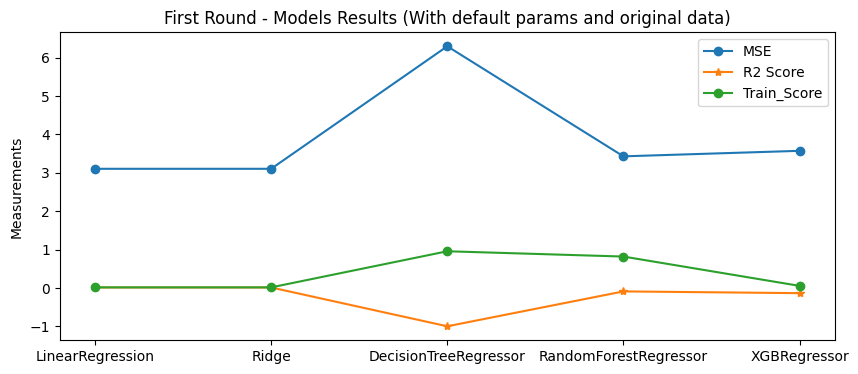

In [ ]:
#plt.subplots(5,2)
plt.figure(figsize=(10,4))
plt.plot(metrics_df['Model_Name'], metrics_df['MSE'], marker='o', label='MSE')
plt.plot(metrics_df['Model_Name'], metrics_df['R2 Score'], marker='*', label='R2 Score')
plt.plot(metrics_df['Model_Name'], metrics_df['Train_Score'], marker='o', label='Train_Score')
plt.legend()
plt.title('First Round - Models Results (With default params and original data)')
plt.ylabel('Measurements')

plt.show()

From the above chart,
1. LinearRegression and Ridge models are giving same results from Train and R2 scores with high MSE.
2. DecisionTreeRegressor has shown increase in Train score but decress in R2 score, with high MSE i.e. this is the case of overfitting.
3. In case of RandomForestRegressor there is increase in Train score compared to baseline model and for R2 score, is more than baseline model but less if compared with DecisionTree and XGBoost models. As data has outliers, and RandomForestRegressor is robust to outliers, so we can consider this model for further investigation.  
4. For XGBRegressor model Train score has increased if compared with baseline model and R2 score has decrease than baseline but it is more than the DecisionTreeRegressor and RandomForestRegressor.


Identify best parameters for PCA to use further...

In [ ]:
# Instantiate & fit PCA model to the original data
# Default n_components will generate the same number of PCs as you have features
test_PCA = PCA()
test_PCA.fit(X_train)

# transform data
X_train_PCA = test_PCA.transform(X_train)
X_test_PCA = test_PCA.transform(X_test)

In [ ]:
X_train.shape[1]

155

Make a line plot of the explained variance_ratio_ attribute

In [ ]:
expl_var = test_PCA.explained_variance_ratio_
expl_var[:50]

array([0.58607935, 0.12359076, 0.03228688, 0.02428915, 0.01385851,
       0.01180198, 0.01129135, 0.01112312, 0.01087883, 0.0094904 ,
       0.00923088, 0.00892482, 0.00851019, 0.00831697, 0.00761328,
       0.00746285, 0.00729089, 0.00675458, 0.00636297, 0.00608309,
       0.00534556, 0.00499718, 0.00408067, 0.00363539, 0.00356099,
       0.00334767, 0.00316098, 0.00301458, 0.00295949, 0.00266017,
       0.0024422 , 0.00240504, 0.0022462 , 0.00193913, 0.00184654,
       0.00183134, 0.00176143, 0.00165271, 0.00162311, 0.00158775,
       0.00155458, 0.00155123, 0.00141535, 0.00134078, 0.00128402,
       0.0011776 , 0.00114946, 0.00108629, 0.0010712 , 0.00106084])

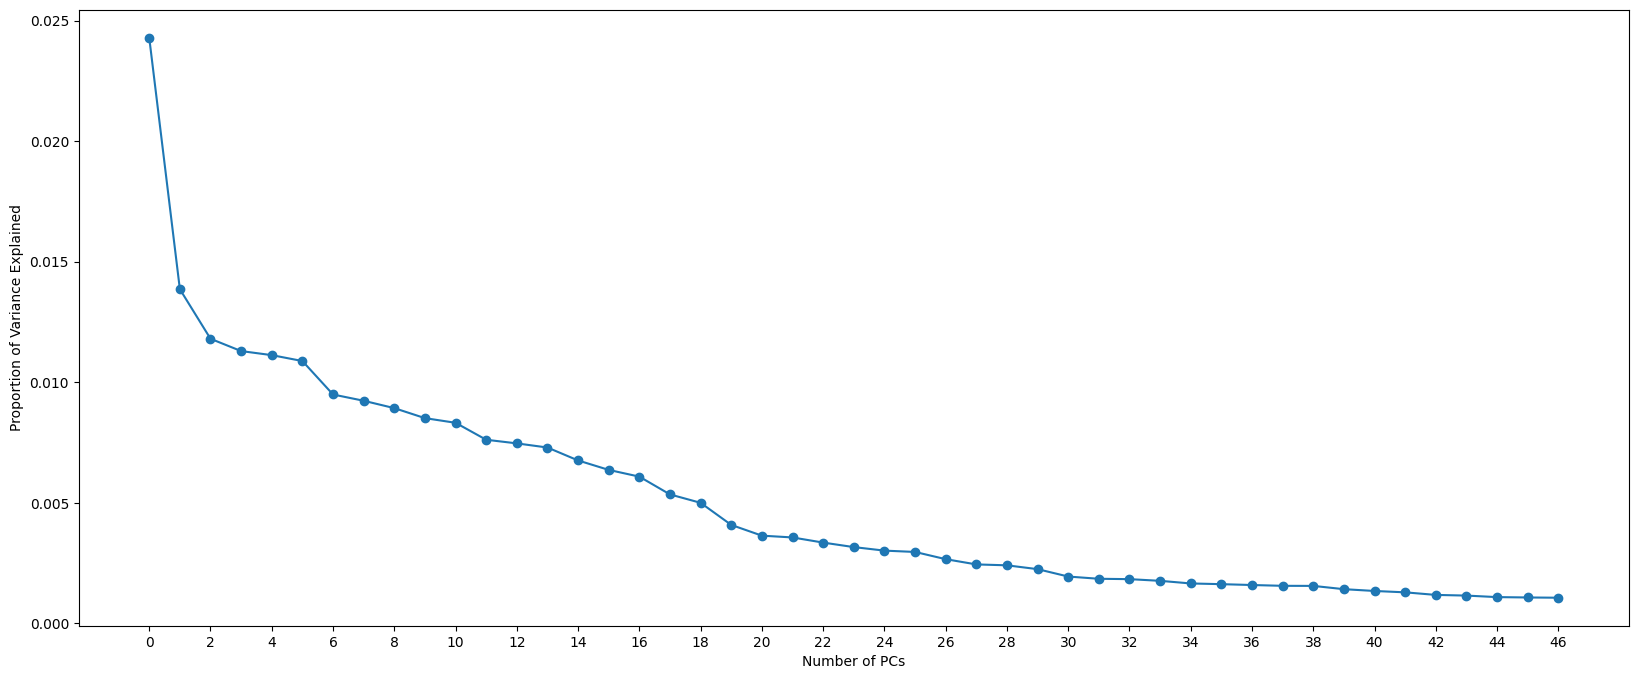

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(range(0,47),expl_var[3:50],marker='o')
#plt.axhline(0)
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(0,47,2))
plt.show()

In [ ]:
# Pull out the explained variance ratio
expl_var = test_PCA.explained_variance_ratio_

# Calculate the cumulative sum of this array using the
cumulative_sum = np.cumsum(expl_var)

cumulative_sum

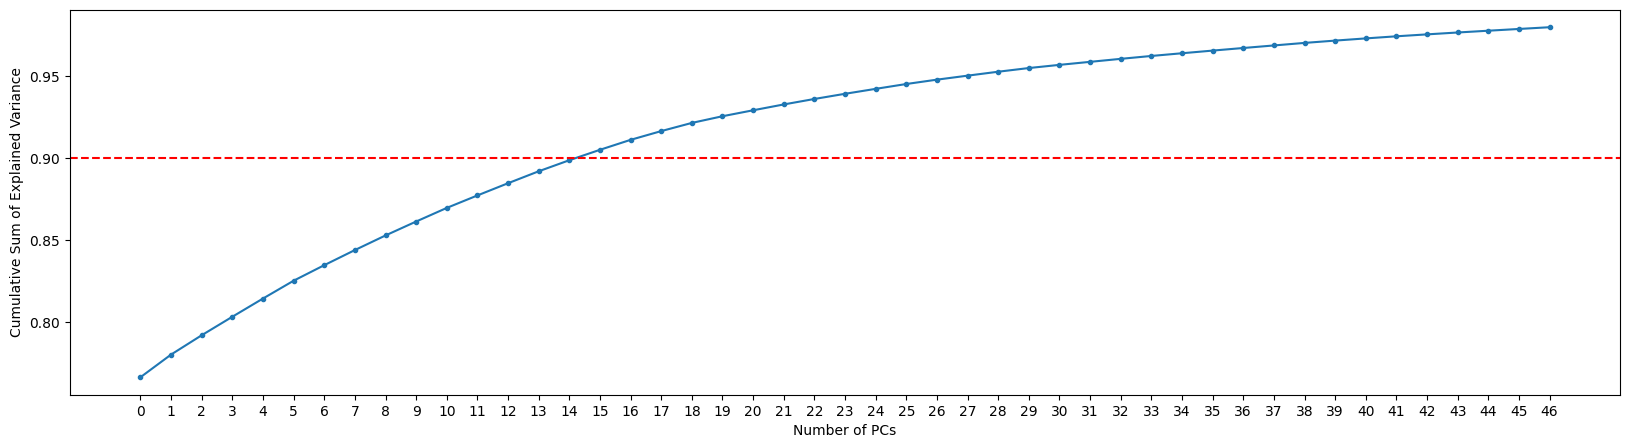

In [ ]:
# Plot out the cumulative sum graph

plt.figure(figsize=(20,5))
#plt.plot(range(0,47),expl_var[3:50],marker='o')
plt.plot(range(0,47), cumulative_sum[3:50], marker='.')
plt.axhline(0.9, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(0,47))
plt.show()


As per the PCA analysis using portion of variance and cumulative sum (to maintain 90% of variance), we can select n_componets within 14 to 20. Let's check the best n_component using LinearRegressor mode.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

components =[14,15,16,17,18,19,20]
estimator = [
    ('scaler',StandardScaler()),
    ('PCA', PCA()),
    ('linearReg',LinearRegression(n_jobs=-1))
]

pipe_LR = Pipeline(estimator, verbose=False)

params = {'PCA__n_components': components,
         'scaler': [StandardScaler(), MinMaxScaler()],}

grids_LR = GridSearchCV(pipe_LR, param_grid=params)

grid_fit_LR = grids_LR.fit(X_train, y_train)

best_param_LR = grids_LR.best_params_
model_LR = grid_fit_LR.best_estimator_

y_pred_LR = model_LR.predict(X_test)

# Evaluate the regressor's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred_LR)
mae = mean_absolute_error(y_test, y_pred_LR)
r2 = r2_score(y_test, y_pred_LR)
train_score = grid_fit_LR.score(X_train, y_train)

print(f"Best paramters are :{best_param_LR}")
print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"R2 score is :{r2}")
print(f"Train score is :{train_score}")


Best paramters are :{'PCA__n_components': 20, 'scaler': MinMaxScaler()}
MSE is :3.1167110415803694
MAE is :1.4645126008558793
R2 score is :0.012619762409406321
Train score is :0.012783611114527416


Let's check the output RandomForestRegressor and XGBoot models with best params for PCA and scaler

### 1. RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

estimator_RF = [
    ('scaler',MinMaxScaler()),
    ('PCA', PCA(n_components=20)),
    ('RF',RandomForestRegressor(n_jobs=-1))
]

pipe_RF = Pipeline(estimator_RF)

pipe_RF.fit(X_train, y_train)

y_pred = pipe_RF.predict(X_test)

# Evaluate the regressor's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
train_score = pipe_RF.score(X_train, y_train)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"R2 score is :{r2}")
print(f"Train score is :{train_score}")

MSE is :3.493199556893506
MAE is :1.5395795675659862
R2 score is :-0.10665254571946048
Train score is :0.012783611114527416


In [ ]:
train_score = pipe_RF.score(X_train, y_train)
print(f"Train score is :{train_score}")

Train score is :0.6833715758999042


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

estimator_RF = [
    ('scaler',StandardScaler()),
    ('PCA', PCA(n_components=20)),
    ('RF',RandomForestRegressor(n_jobs=-1))
]

pipe_RF = Pipeline(estimator_RF)

pipe_RF.fit(X_train, y_train)

y_pred = pipe_RF.predict(X_test)

# Evaluate the regressor's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
train_score = pipe_RF.score(X_train, y_train)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"R2 score is :{r2}")
print(f"Train score is :{train_score}")

MSE is :3.2807802498633065
MAE is :1.4971745881650924
R2 score is :-0.03935768808069873
Train score is :0.42275924018553157


Using StandardScaler with RandomForestRegressor increased the distance between R2 and Train score. So instead of StandardScaler we have to use MinMaxScaler.

****************************************************

### As selection of PCA params, we can proceed for parameter selection for below mentioned models, by keeping the dataset same.
- RandomForestRegressor,
- XGBRegressor
Now we can proceed for parameter selection for RandomForest and XGBoost models, by keeping the dataset same.

In [ ]:
# Dictionary to store regression metrics
metrics_po = {
    'Model_Name': [],
    'MSE': [],
    'MAE': [],
    'R2 Score': [],
    'Train_Score' : [],
    'Best_Params':[],
    'Time_Taken':[]
}
metrics_po

{'Model_Name': [],
 'MSE': [],
 'MAE': [],
 'R2 Score': [],
 'Train_Score': [],
 'Best_Params': [],
 'Time_Taken': []}

### 1. RandomForestRegressor model with grid search

In [ ]:

import time

begin = time.time()
estimator_RF = [
    ('scaler',StandardScaler()),
    ('PCA', PCA(n_components=20)),
    ('RF',RandomForestRegressor(n_jobs=-1))
]

pipe_RF = Pipeline(estimator_RF)

params_RF = {
         'RF__n_estimators':[10,14,],
         'RF__max_depth': [14,28],
         'RF__min_samples_split': [5,10],
         'RF__random_state': [42,50],
         'RF__max_features': ['sqrt','log2'],
         'scaler': [StandardScaler(), MinMaxScaler()]
         }

grids_RF = GridSearchCV(pipe_RF, param_grid=params_RF)

grid_fit_RF = grids_RF.fit(X_train, y_train)

y_pred = grid_fit_RF.predict(X_test)

best_param = grids_RF.best_params_
best_model = grid_fit_RF.best_estimator_

# Evaluate the regressor's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
train_score = grid_fit_RF.score(X_train, y_train)

metrics_po['Model_Name'].append('XGBRegressor')
metrics_po['MSE'].append(mse)
metrics_po['MAE'].append(mae)
metrics_po['R2 Score'].append(r2)
metrics_po['Train_Score'].append(train_score)
metrics_po['Time_Taken'].append(time.time() - begin)
metrics_po['Best_Params'].append(best_param)

metrics_po

{'Model_Name': ['XGBRegressor'],
 'MSE': [3.1554947516091842],
 'MAE': [1.472746476957398],
 'R2 Score': [0.00033300617438536406],
 'Train_Score': [0.07904668950254357],
 'Best_Params': [{'RF__max_depth': 14,
   'RF__max_features': 'log2',
   'RF__min_samples_split': 10,
   'RF__n_estimators': 14,
   'RF__random_state': 50,
   'scaler': StandardScaler()}],
 'Time_Taken': [1939.5335812568665]}

### 2. XGBRegressor model

In [ ]:
begin = time.time()
estimator_xg = [
    ('scaler',RobustScaler()),
    ('PCA', PCA()),
    ('XGBoost',XGBRegressor(n_jobs=-1))
]

pipe_XG = Pipeline(estimator_xg)

params_XG = {
         'XGBoost__n_estimators':[10,14,],
         'XGBoost__max_depth': [8,12],
         'XGBoost__random_state': [42,50],
         'scaler': [StandardScaler(), MinMaxScaler()],
         'PCA__n_components':[50,60,70,80]
         }

grids_XG = GridSearchCV(pipe_XG, param_grid=params_XG)

grid_fit_XG = grids_XG.fit(X_train, y_train)

y_pred = grid_fit_XG.predict(X_test)

best_param = grids_XG.best_params_
best_model = grid_fit_XG.best_estimator_

# Evaluate the regressor's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
train_score = grid_fit_XG.score(X_train, y_train)

metrics_po['Model_Name'].append('XGBRegressor_RobustScaler')
metrics_po['MSE'].append(mse)
metrics_po['MAE'].append(mae)
metrics_po['R2 Score'].append(r2)
metrics_po['Train_Score'].append(train_score)
metrics_po['Time_Taken'].append(time.time() - begin)
metrics_po['Best_Params'].append(best_param)

metrics_po

KeyboardInterrupt: 

In [ ]:
metrics_po_df = pd.DataFrame(metrics_po)
metrics_po_df

,Model_Name,MSE,MAE,R2 Score,Train_Score,Best_Params,Time_Taken
0,RandomForestRegressor,3.155495,1.472746,0.000333,0.079047,"{'RF__max_depth': 14, 'RF__max_features': 'log...",1939.533581
1,XGBRegressor,3.150060,1.470837,0.002055,0.071874,"{'XGBoost__max_depth': 8, 'XGBoost__n_estimato...",248.539243
2,XGBRegressor_PCA,3.148617,1.471147,0.002512,0.054768,"{'PCA__n_components': 14, 'XGBoost__max_depth'...",811.833045


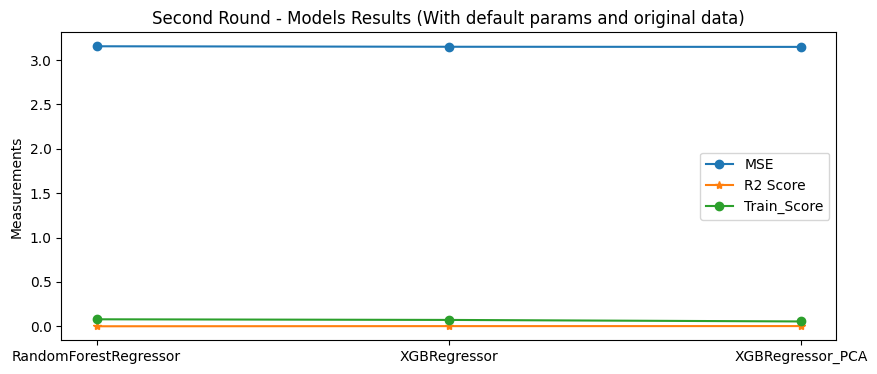

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(metrics_po_df['Model_Name'], metrics_po_df['MSE'], marker='o', label='MSE')
plt.plot(metrics_po_df['Model_Name'], metrics_po_df['R2 Score'], marker='*', label='R2 Score')
plt.plot(metrics_po_df['Model_Name'], metrics_po_df['Train_Score'], marker='o', label='Train_Score')
plt.legend()
plt.title('Second Round - Models Results (With default params and original data)')
plt.ylabel('Measurements')

plt.show()

It seems XGBoost with PCA model is trying to minimize the gap between Train and R2 scores, so lets try the same combination with lover n_component of PCA. As well as we can try reducing XGBoost's params.

In [ ]:
from re import VERBOSE
begin = time.time()
estimator_xg = [
    ('scaler',StandardScaler()),
    ('PCA', PCA()),
    ('XGBoost',XGBRegressor(n_jobs=-1, random_state =42, verbosity=1)) #verbosity =1 (Info)
]

pipe_XG = Pipeline(estimator_xg)

params_XG = {
         'XGBoost__n_estimators':[5,8,10],
         'XGBoost__max_depth': [4,5,8],
         'scaler': [StandardScaler(), MinMaxScaler()],
         'PCA__n_components':[10,14,20],
         'XGBoost__eta':[0.1,0.3]
         }

grids_XG = GridSearchCV(pipe_XG, param_grid=params_XG)

grid_fit_XG = grids_XG.fit(X_train, y_train)

y_pred = grid_fit_XG.predict(X_test)

best_param = grids_XG.best_params_
best_model = grid_fit_XG.best_estimator_

# Evaluate the regressor's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
train_score = grid_fit_XG.score(X_train, y_train)

metrics_po['Model_Name'].append('XGBRegressor_PCA2')
metrics_po['MSE'].append(mse)
metrics_po['MAE'].append(mae)
metrics_po['R2 Score'].append(r2)
metrics_po['Train_Score'].append(train_score)
metrics_po['Time_Taken'].append(time.time() - begin)
metrics_po['Best_Params'].append(best_param)

metrics_po

{'Model_Name': ['RandomForestRegressor',
  'XGBRegressor',
  'XGBRegressor_PCA',
  'XGBRegressor_PCA2'],
 'MSE': [3.1554947516091842,
  3.150060212713188,
  3.1486170084263336,
  3.117955681570346],
 'MAE': [1.472746476957398,
  1.4708368607924949,
  1.4711465236527348,
  1.4651868087064692],
 'R2 Score': [0.00033300617438536406,
  0.002054678871897808,
  0.002511888851467581,
  0.012225457992787958],
 'Train_Score': [0.07904668950254357,
  0.07187354873107876,
  0.054768195461758484,
  0.01572415841024133],
 'Best_Params': [{'RF__max_depth': 14,
   'RF__max_features': 'log2',
   'RF__min_samples_split': 10,
   'RF__n_estimators': 14,
   'RF__random_state': 50,
   'scaler': StandardScaler()},
  {'XGBoost__max_depth': 8,
   'XGBoost__n_estimators': 10,
   'XGBoost__random_state': 42,
   'scaler': MinMaxScaler()},
  {'PCA__n_components': 14,
   'XGBoost__max_depth': 8,
   'XGBoost__n_estimators': 10,
   'XGBoost__random_state': 42,
   'scaler': StandardScaler()},
  {'PCA__n_components': 

In [ ]:
metrics_po_df = pd.DataFrame(metrics_po)
metrics_po_df

,Model_Name,MSE,MAE,R2 Score,Train_Score,Best_Params,Time_Taken
0,RandomForestRegressor,3.155495,1.472746,0.000333,0.079047,"{'RF__max_depth': 14, 'RF__max_features': 'log...",1939.533581
1,XGBRegressor,3.150060,1.470837,0.002055,0.071874,"{'XGBoost__max_depth': 8, 'XGBoost__n_estimato...",248.539243
2,XGBRegressor_PCA,3.148617,1.471147,0.002512,0.054768,"{'PCA__n_components': 14, 'XGBoost__max_depth'...",811.833045
3,XGBRegressor_PCA2,3.117956,1.465187,0.012225,0.015724,"{'PCA__n_components': 20, 'XGBoost__eta': 0.3,...",1122.140818


In first round of testing, DicisionTree model has given high Train score but low R2 score i.e. sign of overfitting, hence we can try PCA's multiple combinations with DecisionTree model.  

In [ ]:
begin = time.time()
# store starting time
begin = time.time()
estimator_dt = [
     ('scaler',StandardScaler()),
     ('PCA', PCA()),
     ('DT',DecisionTreeRegressor(random_state=42,   ))
]
pipe_DT = Pipeline(estimator_dt)

params_DT = {
         'DT__max_depth': [4,5,8],
         'scaler': [StandardScaler(), MinMaxScaler()],
         'PCA__n_components':[10,14,20],
         'DT__max_features':['sqrt','log2'],
         'DT__max_leaf_nodes':[50,10,20]
         }

grids_DT = GridSearchCV(pipe_DT, param_grid= params_DT)

grids_fit_DT = grids_DT.fit(X_train, y_train)

best_param = grids_DT.best_params_

train_score = grids_fit_DT.score(X_train, y_train)
y_pred = grids_fit_DT.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


metrics_po['Model_Name'].append('DecisionTreeRegressor_PCA')
metrics_po['MSE'].append(mse)
metrics_po['MAE'].append(mae)
metrics_po['R2 Score'].append(r2)
metrics_po['Train_Score'].append(train_score)
metrics_po['Time_Taken'].append(time.time() - begin)
metrics_po['Best_Params'].append(best_param)

metrics_po

{'Model_Name': ['RandomForestRegressor',
  'XGBRegressor',
  'XGBRegressor_PCA',
  'XGBRegressor_PCA2',
  'DecisionTreeRegressor_PCA'],
 'MSE': [3.1554947516091842,
  3.150060212713188,
  3.1486170084263336,
  3.117955681570346,
  3.135644563280781],
 'MAE': [1.472746476957398,
  1.4708368607924949,
  1.4711465236527348,
  1.4651868087064692,
  1.467671427183718],
 'R2 Score': [0.00033300617438536406,
  0.002054678871897808,
  0.002511888851467581,
  0.012225457992787958,
  0.006621585194524049],
 'Train_Score': [0.07904668950254357,
  0.07187354873107876,
  0.054768195461758484,
  0.01572415841024133,
  0.008469520578167522],
 'Best_Params': [{'RF__max_depth': 14,
   'RF__max_features': 'log2',
   'RF__min_samples_split': 10,
   'RF__n_estimators': 14,
   'RF__random_state': 50,
   'scaler': StandardScaler()},
  {'XGBoost__max_depth': 8,
   'XGBoost__n_estimators': 10,
   'XGBoost__random_state': 42,
   'scaler': MinMaxScaler()},
  {'PCA__n_components': 14,
   'XGBoost__max_depth': 8,

In [ ]:
metrics_po_df = pd.DataFrame(metrics_po)
metrics_po_df

,Model_Name,MSE,MAE,R2 Score,Train_Score,Best_Params,Time_Taken
0,RandomForestRegressor,3.155495,1.472746,0.000333,0.079047,"{'RF__max_depth': 14, 'RF__max_features': 'log...",1939.533581
1,XGBRegressor,3.150060,1.470837,0.002055,0.071874,"{'XGBoost__max_depth': 8, 'XGBoost__n_estimato...",248.539243
2,XGBRegressor_PCA,3.148617,1.471147,0.002512,0.054768,"{'PCA__n_components': 14, 'XGBoost__max_depth'...",811.833045
3,XGBRegressor_PCA2,3.117956,1.465187,0.012225,0.015724,"{'PCA__n_components': 20, 'XGBoost__eta': 0.3,...",1122.140818
4,DecisionTreeRegressor_PCA,3.135645,1.467671,0.006622,0.008470,"{'DT__max_depth': 4, 'DT__max_features': 'sqrt...",1117.084563
5,DecisionTreeRegressor_PCA2,3.127843,1.466150,0.009093,0.008253,"{'DT__criterion': 'friedman_mse', 'DT__max_dep...",71.123802
6,DecisionTreeRegressor_Without_PCA3,3.127843,1.466150,0.009093,0.008253,"{'DT__criterion': 'friedman_mse', 'DT__max_dep...",1.072979


In [ ]:
begin = time.time()
# store starting time
begin = time.time()
estimator_dt = [
     ('scaler',StandardScaler()),
     #('PCA', PCA(n_components=14)),
     ('DT',DecisionTreeRegressor(random_state=42, max_features='sqrt', splitter='best', criterion='friedman_mse', max_leaf_nodes=40, max_depth=4, min_impurity_decrease=0.0 ))
]
pipe_DT = Pipeline(estimator_dt)

params_DT = {
         'DT__min_impurity_decrease':[0.0,0.1]
         }

#grids_DT = GridSearchCV(pipe_DT, param_grid= params_DT)

pipe_DT.fit(X_train, y_train)

train_score = pipe_DT.score(X_train, y_train)
y_pred = pipe_DT.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


metrics_po['Model_Name'].append('DecisionTreeRegressor_Without_PCA3')
metrics_po['MSE'].append(mse)
metrics_po['MAE'].append(mae)
metrics_po['R2 Score'].append(r2)
metrics_po['Train_Score'].append(train_score)
metrics_po['Time_Taken'].append(time.time() - begin)
metrics_po['Best_Params'].append(best_param)

#print(f"{grids_DT.feature_names_in_}")
metrics_po

{'Model_Name': ['RandomForestRegressor',
  'XGBRegressor',
  'XGBRegressor_PCA',
  'XGBRegressor_PCA2',
  'DecisionTreeRegressor_PCA',
  'DecisionTreeRegressor_PCA2',
  'DecisionTreeRegressor_Without_PCA3'],
 'MSE': [3.1554947516091842,
  3.150060212713188,
  3.1486170084263336,
  3.117955681570346,
  3.135644563280781,
  3.1278433637901704,
  3.1278433637901704],
 'MAE': [1.472746476957398,
  1.4708368607924949,
  1.4711465236527348,
  1.4651868087064692,
  1.467671427183718,
  1.4661504783207173,
  1.4661504783207173],
 'R2 Score': [0.00033300617438536406,
  0.002054678871897808,
  0.002511888851467581,
  0.012225457992787958,
  0.006621585194524049,
  0.009093020660875473,
  0.009093020660875473],
 'Train_Score': [0.07904668950254357,
  0.07187354873107876,
  0.054768195461758484,
  0.01572415841024133,
  0.008469520578167522,
  0.008253365366417853,
  0.008253365366417853],
 'Best_Params': [{'RF__max_depth': 14,
   'RF__max_features': 'log2',
   'RF__min_samples_split': 10,
   'RF_

In [ ]:

# store starting time
begin = time.time()
estimator_dt = [
    ('scaler',StandardScaler()),
     ('PCA', PCA()),
    ('DT',DecisionTreeRegressor(random_state=42))
]

pipe_DT = Pipeline(estimator_dt)

pipe_DT.fit(X_train, y_train)

train_score = pipe_DT.score(X_train, y_train)
test_score = pipe_DT.score(X_test, y_test)
y_pred = pipe_DT.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

'''
metrics['Model_Name'].append('DecisionTreeRegressor')
metrics['MSE'].append(mse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train_Score'].append(train_score)
metrics['Time_Taken'].append(time.time() - begin)

metrics
'''
print(f"Model_Name: DecisionTreeRegressor")
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"R2 Score :{r2}")
print(f"Train_Score: {train_score}")
print(f"Time_Taken : {time.time() - begin}")

Model_Name: DecisionTreeRegressor
MSE:6.296709276772962
MAE:2.03857596529697
R2 Score :-0.9948099835993927
Train_Score: 0.9586601567671628
Time_Taken : 36.10729742050171


In [ ]:
# Dictionary to store regression metrics
metrics_DT = {
    'Model_Name': [],
    'MSE': [],
    'MAE': [],
    'R2 Score': [],
    'Time_Taken':[],
    'Train_Score' : [],
    'Best_Params':[]
}
metrics_DT

{'Model_Name': [],
 'MSE': [],
 'MAE': [],
 'R2 Score': [],
 'Time_Taken': [],
 'Train_Score': [],
 'Best_Params': []}

In [ ]:
begin = time.time()
# store starting time
begin = time.time()
estimator_dt = [
     ('scaler',StandardScaler()),
     ('PCA', PCA()),
     ('DT',DecisionTreeRegressor(random_state=42, max_features='sqrt'))
]
pipe_DT = Pipeline(estimator_dt)

params_DT = {
         'DT__max_depth': [5,8,10],
         #'scaler': [StandardScaler(), MinMaxScaler()],
         #'DT__max_features':['sqrt','log2'],
         'DT__max_leaf_nodes':[50,35,20]
         }

grids_DT = GridSearchCV(pipe_DT, param_grid= params_DT)

grids_fit_DT = grids_DT.fit(X_train, y_train)

best_param = grids_DT.best_params_

train_score = grids_fit_DT.score(X_train, y_train)
y_pred = grids_fit_DT.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


metrics_DT['Model_Name'].append('DecisionTreeRegressor_PCA2')
metrics_DT['MSE'].append(mse)
metrics_DT['MAE'].append(mae)
metrics_DT['R2 Score'].append(r2)
metrics_DT['Train_Score'].append(train_score)
metrics_DT['Time_Taken'].append(time.time() - begin)
metrics_DT['Best_Params'].append(best_param)

metrics_DT

{'Model_Name': ['DecisionTreeRegressor_WithoutPCA',
  'DecisionTreeRegressor_PCA2'],
 'MSE': [3.12544159077026, 3.14069464577668],
 'MAE': [1.4654551618383742, 1.4689995939211282],
 'R2 Score': [0.009853907115667027, 0.005021709046838407],
 'Time_Taken': [53.72171711921692, 164.71396899223328],
 'Train_Score': [0.009600994298249121, 0.008484245727701345],
 'Best_Params': [{'DT__max_depth': 8,
   'DT__max_features': 'sqrt',
   'DT__max_leaf_nodes': 20,
   'scaler': StandardScaler()},
  {'DT__max_depth': 10, 'DT__max_leaf_nodes': 20}]}

In [ ]:
begin = time.time()
# store starting time
begin = time.time()
estimator_dt = [
     ('scaler',StandardScaler()),
     ('PCA', PCA()),
     ('DT',DecisionTreeRegressor(random_state=42, max_features='sqrt'))
]
pipe_DT = Pipeline(estimator_dt)

params_DT = {
         'DT__max_depth': [5,8,10],
         #'scaler': [StandardScaler(), MinMaxScaler()],
         #'DT__max_features':['sqrt','log2'],
         'DT__max_leaf_nodes':[50,35,20],
         'PCA__n_components':[14,18,20,25]
         }

grids_DT = GridSearchCV(pipe_DT, param_grid= params_DT)

grids_fit_DT = grids_DT.fit(X_train, y_train)

best_param = grids_DT.best_params_

train_score = grids_fit_DT.score(X_train, y_train)
y_pred = grids_fit_DT.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


metrics_DT['Model_Name'].append('DecisionTreeRegressor_PCA2')
metrics_DT['MSE'].append(mse)
metrics_DT['MAE'].append(mae)
metrics_DT['R2 Score'].append(r2)
metrics_DT['Train_Score'].append(train_score)
metrics_DT['Time_Taken'].append(time.time() - begin)
metrics_DT['Best_Params'].append(best_param)

metrics_DT

{'Model_Name': ['DecisionTreeRegressor_WithoutPCA',
  'DecisionTreeRegressor_PCA2',
  'DecisionTreeRegressor_PCA2'],
 'MSE': [3.12544159077026, 3.14069464577668, 3.131211182354598],
 'MAE': [1.4654551618383742, 1.4689995939211282, 1.46743202197525],
 'R2 Score': [0.009853907115667027, 0.005021709046838407, 0.00802608906216673],
 'Time_Taken': [53.72171711921692, 164.71396899223328, 352.1675605773926],
 'Train_Score': [0.009600994298249121,
  0.008484245727701345,
  0.009096330919790119],
 'Best_Params': [{'DT__max_depth': 8,
   'DT__max_features': 'sqrt',
   'DT__max_leaf_nodes': 20,
   'scaler': StandardScaler()},
  {'DT__max_depth': 10, 'DT__max_leaf_nodes': 20},
  {'DT__max_depth': 10, 'DT__max_leaf_nodes': 20, 'PCA__n_components': 14}]}

In [ ]:
metrics_DT_df = pd.DataFrame(metrics_DT)
metrics_DT_df

,Model_Name,MSE,MAE,R2 Score,Time_Taken,Train_Score,Best_Params
0,DecisionTreeRegressor_WithoutPCA,3.125442,1.465455,0.009854,53.721717,0.009601,"{'DT__max_depth': 8, 'DT__max_features': 'sqrt..."
1,DecisionTreeRegressor_PCA2,3.140695,1.469000,0.005022,164.713969,0.008484,"{'DT__max_depth': 10, 'DT__max_leaf_nodes': 20}"
2,DecisionTreeRegressor_PCA2,3.131211,1.467432,0.008026,352.167561,0.009096,"{'DT__max_depth': 10, 'DT__max_leaf_nodes': 20..."


In [ ]:

# store starting time
begin = time.time()
estimator_dt = [
    ('scaler',StandardScaler()),
     ('PCA', PCA()),
    ('DT',DecisionTreeRegressor(random_state=42))
]

pipe_DT = Pipeline(estimator_dt)

pipe_DT.fit(X_train, y_train)

train_score = pipe_DT.score(X_train, y_train)
test_score = pipe_DT.score(X_test, y_test)
y_pred = pipe_DT.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

'''
metrics['Model_Name'].append('DecisionTreeRegressor')
metrics['MSE'].append(mse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train_Score'].append(train_score)
metrics['Time_Taken'].append(time.time() - begin)

metrics
'''
print(f"Model_Name: DecisionTreeRegressor")
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"R2 Score :{r2}")
print(f"Train_Score: {train_score}")
print(f"Time_Taken : {time.time() - begin}")

Model_Name: DecisionTreeRegressor
MSE:6.296709276772962
MAE:2.03857596529697
R2 Score :-0.9948099835993927
Train_Score: 0.9586601567671628
Time_Taken : 40.20784258842468


### Testing SVR model with original data

In [17]:
begin = time.time()
estimator_svr = [
    ('scaler',StandardScaler()),
     ('PCA', PCA()),
    ('SVR',SVR())
]

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

model = SVR(kernel= 'poly' )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics['Model_Name'].append('SVR_PCA')
metrics['MSE'].append(mse)
metrics['MAE'].append(mae)
metrics['R2 Score'].append(r2)
metrics['Train_Score'].append(train_score)
metrics['Time_Taken'].append(time.time() - begin)
metrics['Best_Params'].append(best_param)

metrics

NameError: name 'train_score' is not defined